In [13]:
import pandas as pd


file_path = r"C:\Users\yasmi\OneDrive\Desktop\visualization assignment\ai_job_market_insights.csv"


data = pd.read_csv(file_path)


data.head()


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.16520,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56247,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26310,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95376,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92217,Yes,Decline


In [15]:
import plotly.express as px

In [20]:
cleaned_data= data.dropna()


In [22]:
cleaned_data.head()


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.16520,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56247,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26310,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95376,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92217,Yes,Decline


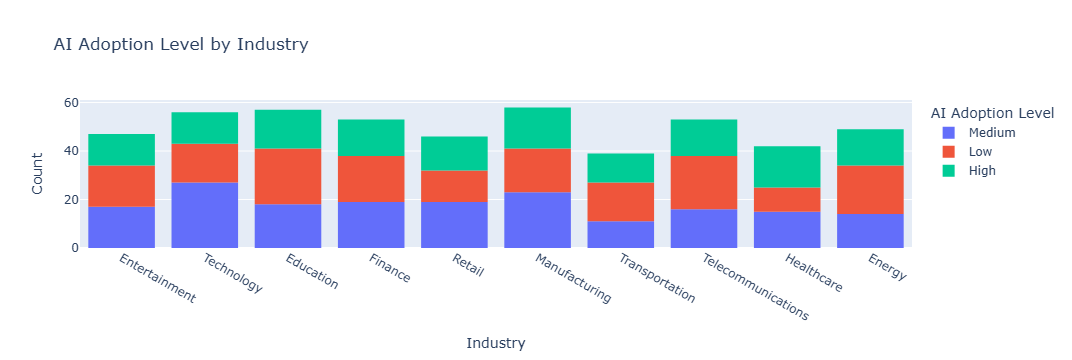

In [32]:

fig = px.histogram(data, x='Industry', color='AI_Adoption_Level', 
                   title='AI Adoption Level by Industry',
                   labels={'AI_Adoption_Level': 'AI Adoption Level', 'Industry': 'Industry'})
fig.update_layout(xaxis_title='Industry', yaxis_title='Count')
fig.show()


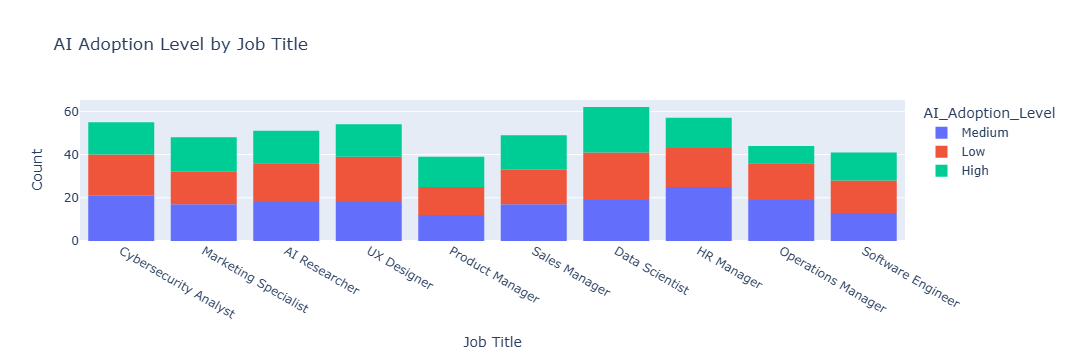

In [34]:
fig = px.histogram(data, x='Job_Title', color='AI_Adoption_Level', 
                   title='AI Adoption Level by Job Title')
fig.update_layout(xaxis_title='Job Title', yaxis_title='Count')
fig.show()


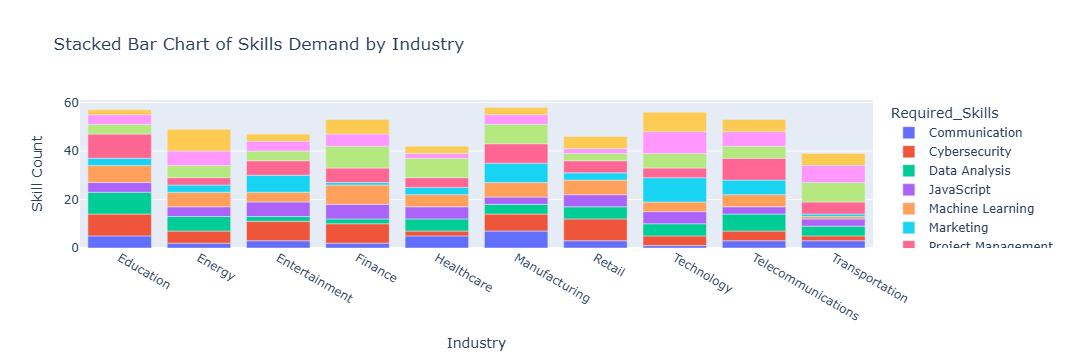

In [40]:

skill_counts = data.groupby(['Industry', 'Required_Skills']).size().reset_index(name='Count')
fig = px.bar(skill_counts, x='Industry', y='Count', color='Required_Skills', 
             title='Stacked Bar Chart of Skills Demand by Industry')

fig.update_layout(xaxis_title='Industry', yaxis_title='Skill Count')
fig.show()


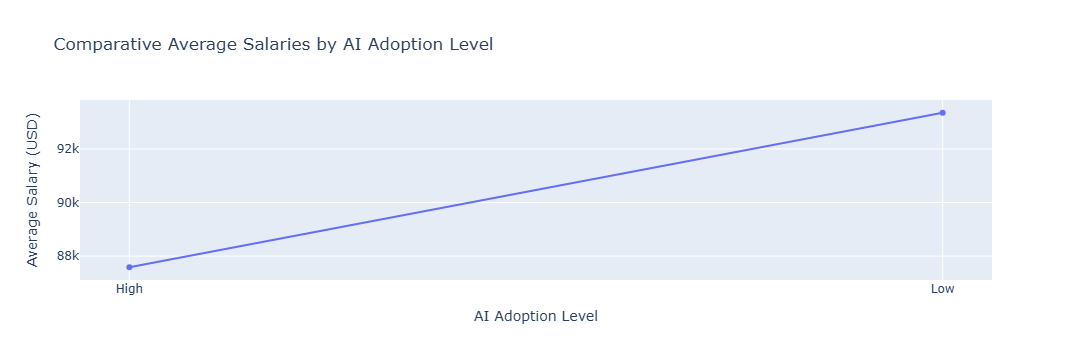

In [46]:

# Filter the data
data_high_ai = data[data['AI_Adoption_Level'] == 'High']
data_low_ai = data[data['AI_Adoption_Level'] == 'Low']

average_salaries = pd.DataFrame({
    'AI_Adoption_Level': ['High', 'Low'],
    'Average_Salary_USD': [
        data_high_ai['Salary_USD'].mean(),
        data_low_ai['Salary_USD'].mean()
    ]
})
plot_data = pd.DataFrame({
    'AI_Adoption_Level': ['High', 'Low'],
    'Average_Salary_USD': [data_high_ai['Salary_USD'].mean(), data_low_ai['Salary_USD'].mean()]
})

# Create the line chart
fig = px.line(plot_data, x='AI_Adoption_Level', y='Average_Salary_USD',
              title='Comparative Average Salaries by AI Adoption Level',
              labels={'AI_Adoption_Level': 'AI Adoption Level', 'Average_Salary_USD': 'Average Salary (USD)'},
              markers=True)

fig.update_layout(xaxis_title='AI Adoption Level', yaxis_title='Average Salary (USD)')
fig.show()


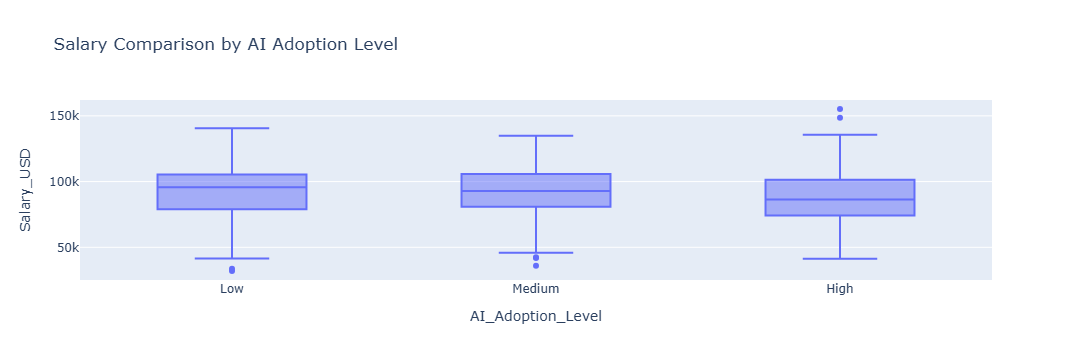

In [54]:
# Create a new DataFrame with only relevant columns
salary_comparison = data[["AI_Adoption_Level", "Salary_USD"]]

# Create the box plot
fig = px.box(salary_comparison, x="AI_Adoption_Level", y="Salary_USD", 
             title="Salary Comparison by AI Adoption Level",
            category_orders={"AI_Adoption_Level": ["Low", "Medium", "High"]})
fig.show()

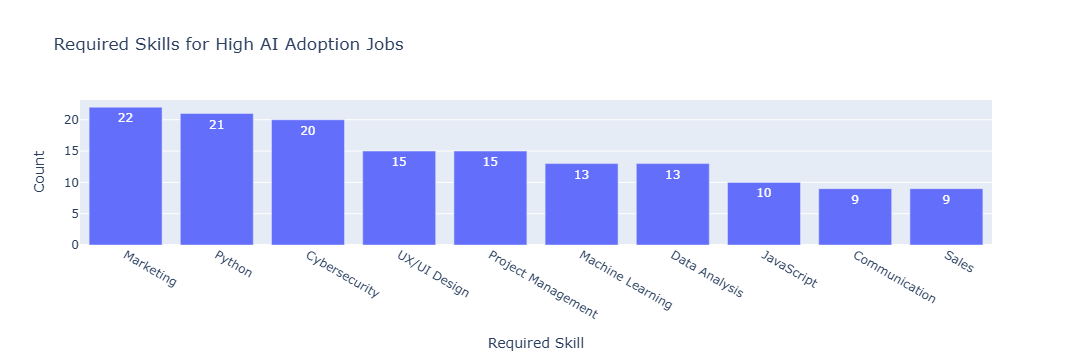

In [60]:

data_high_ai = data[data['AI_Adoption_Level'] == 'High']
skills_expanded = data_high_ai.explode('Required_Skills')

skill_counts = skills_expanded['Required_Skills'].value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# Create the bar chart
fig = px.bar(skill_counts, x='Skill', y='Count',
             title='Required Skills for High AI Adoption Jobs',
             labels={'Skill': 'Required Skill', 'Count': 'Count'},
             text='Count')

fig.update_layout(xaxis_title='Required Skill', yaxis_title='Count')
fig.show()

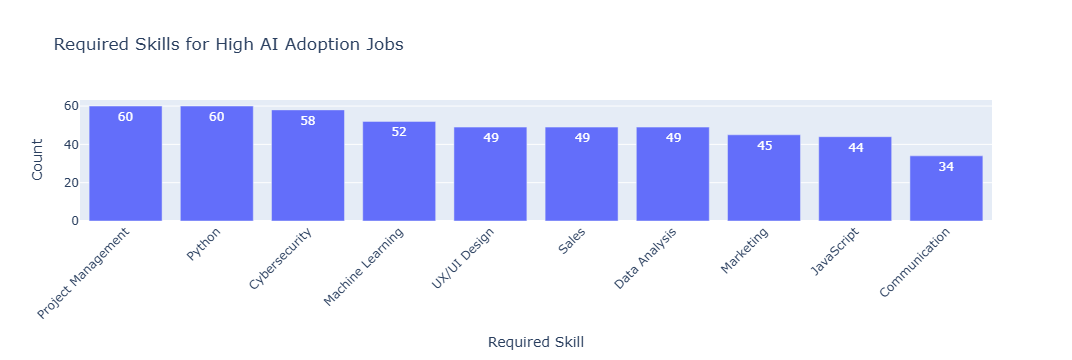

In [62]:



skills_expanded = data.explode('Required_Skills')

skill_counts = skills_expanded['Required_Skills'].value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# Create the bar chart
fig = px.bar(skill_counts, x='Skill', y='Count',
             title='Required Skills for High AI Adoption Jobs',
             labels={'Skill': 'Required Skill', 'Count': 'Count'},
             text='Count')

fig.update_layout(xaxis_title='Required Skill', yaxis_title='Count', xaxis_tickangle=-45)
fig.show()

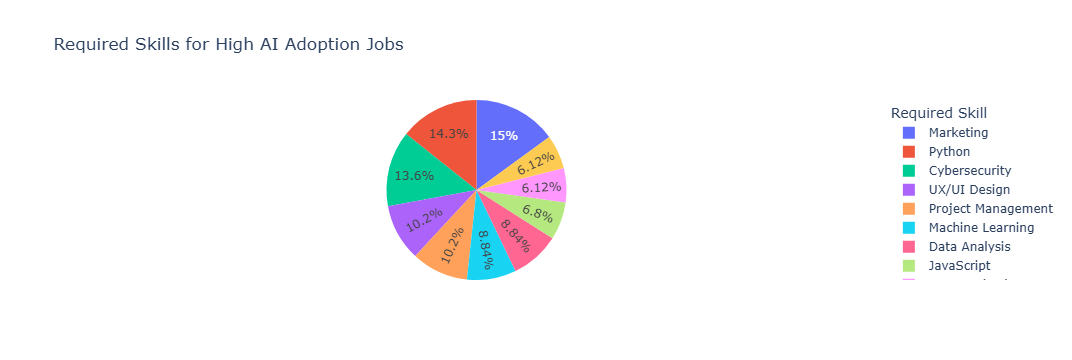

In [66]:
import plotly.express as px

# Filter data for high AI adoption
data_high_ai = data[data['AI_Adoption_Level'] == 'High']

# Explode the 'Required_Skills' column
skills_expanded = data_high_ai.explode('Required_Skills')

# Count occurrences of each skill
skill_counts = skills_expanded['Required_Skills'].value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# Create the pie chart
fig = px.pie(skill_counts, names='Skill', values='Count',
             title='Required Skills for High AI Adoption Jobs',
             labels={'Skill': 'Required Skill', 'Count': 'Count'})

fig.update_layout(
    legend_title='Required Skill'
)

fig.show()


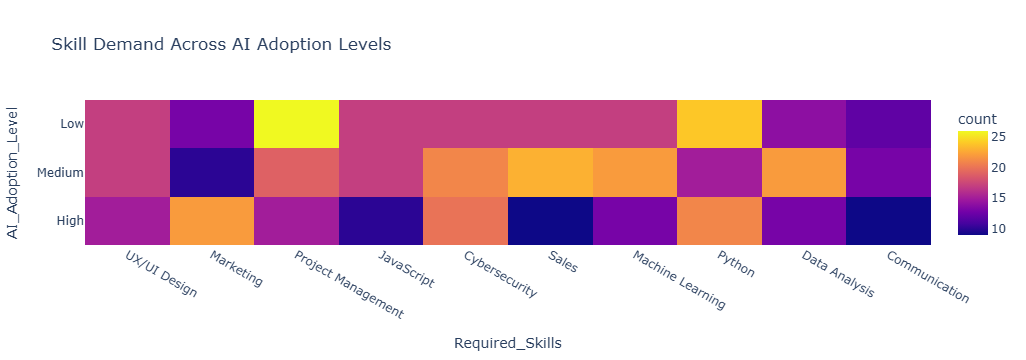

In [72]:
skill_counts = skills_expanded['Required_Skills'].value_counts().reset_index()
ai_adoption_order = ['Low', 'Medium', 'High']
fig = px.density_heatmap(
    data,
    x='Required_Skills',
    y='AI_Adoption_Level',
    title='Skill Demand Across AI Adoption Levels',
    category_orders={'AI_Adoption_Level': ai_adoption_order}
)
fig.show()